# Game Success Predictor

In [4]:
# Import all the necesary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read dataset and show the general info for initial analysis
df = pd.read_csv('C:/DS/Projects/GameSuccessPredictor/datasets/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# Change columns names by list comprehension
df.columns = [col.lower() for col in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
df.head()
# Columns that need data type change: year_of_release, critic_score, user_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Fill missing values and change data types

### Names

In [8]:
df['name'].isna().sum() # 2 missing values
df['name'] = df['name'].fillna('Unknown')


### Year of release

In [9]:
# Type conversion for columns that need it
df['year_of_release'].isna().sum()
df['year_of_release'] = (
    df['year_of_release']
    .fillna(0.0)               
    .astype('int')             
    .astype('str')             
    .replace('0', 'Unknown')   
)

### Genre

In [12]:
df['genre'].isna().sum() # 2 missing values
df['genre'] = df['genre'].fillna('Unknown')

### Critic Score

In [13]:
# Verify if there is any value with a decimal
(df['critic_score'] % 1 != 0).any() # Returns True that means there are values with a decimal
df['critic_score'].isna().sum()     # 8578 missing values
df['critic_score'] = df['critic_score'].fillna(0)


### User Score 

In [18]:
df['user_score'].isna().sum()
df['user_score'] = df['user_score'].fillna('0')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

### Rating

In [15]:
df['rating'].unique() # array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)
df['rating'].isna().sum() # 6766 missing values
df['rating'] = df['rating'].fillna('Unknown')

### Final check for missing values

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  object 
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Duplicates check

In [20]:
df.duplicated().sum()

0

## Total sales

In [21]:
df['total_sales'] = df['eu_sales'] + df['na_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,Unknown,31.38


## Data Analysis

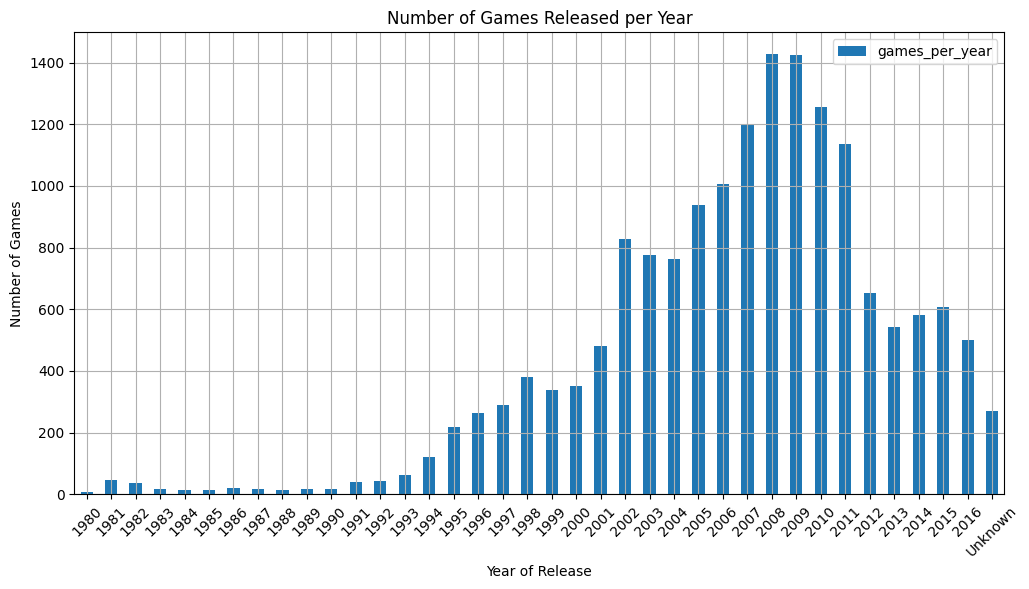

In [24]:
df_games_per_year = df.groupby('year_of_release')['name'].count().reset_index()
df_games_per_year = df_games_per_year.rename(columns={'name':'games_per_year'})


df_games_per_year.plot(kind='bar',
                       x='year_of_release',
                       y='games_per_year',
                       title='Number of Games Released per Year',
                       xlabel='Year of Release',
                       ylabel='Number of Games',
                       grid=True,
                       rot=45,
                       figsize=(12, 6))

# Mostrar el gráfico
plt.show()


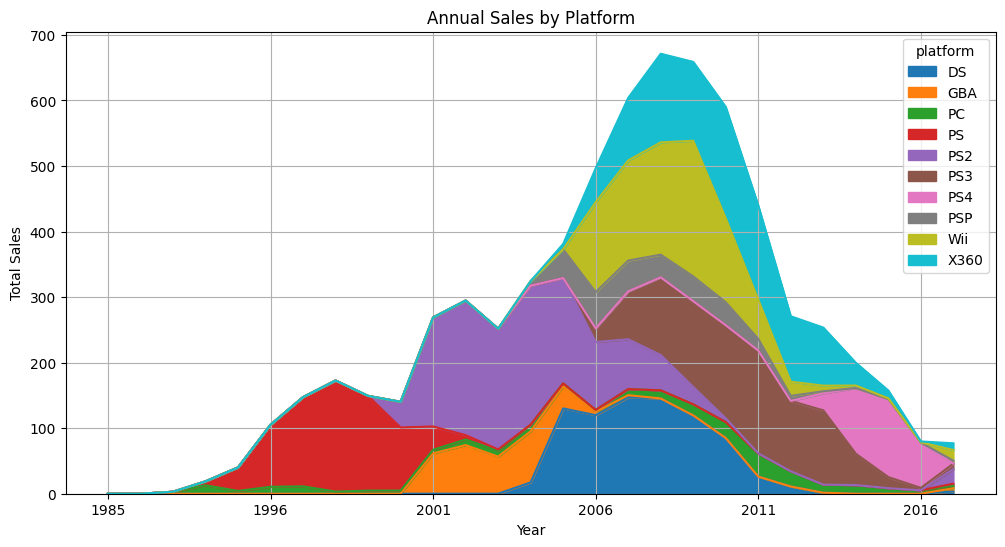

In [30]:
# Get top 10 platforms by total sales
df_sales_per_platform = df.groupby('platform')['total_sales'].sum().reset_index()
df_sales_per_platform_sort = df_sales_per_platform.sort_values(by='total_sales', ascending=False).reset_index(drop=True)
top_10_platforms = df_sales_per_platform_sort.head(10)
top_10_platforms = top_10_platforms['platform'].tolist()

# Dataframe filtered by top 10 platforms
df_top_10_platforms = df[df['platform'].isin(top_10_platforms)].reset_index(drop=True)

df_sales_per_year_per_platform = df_top_10_platforms.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()

# Pivotar los datos para un gráfico de áreas apiladas
df_pivot = df_sales_per_year_per_platform.pivot(index='year_of_release', columns='platform', values='total_sales')
df_pivot = df_pivot.fillna(0)

df_pivot.plot(kind='area', 
              stacked=True, 
              figsize=(12, 6),
              xlabel='Year',
              ylabel='Total Sales',
              title='Annual Sales by Platform',
              grid=True)

plt.show()